In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt 
pd.options.mode.chained_assignment=None

In [2]:
tickers=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
...,...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [3]:
tickers=tickers.Symbol
tickers

0       MMM
1       AOS
2       ABT
3      ABBV
4      ABMD
       ... 
498     YUM
499    ZBRA
500     ZBH
501    ZION
502     ZTS
Name: Symbol, Length: 503, dtype: object

In [4]:
tickers=[i.replace('.','-') for i in tickers]

In [5]:
tickers

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCS

In [6]:
tickers.pop(489)

'WRK'

In [7]:
def RSIcalc(assets):
    df=yf.download(assets,start='2011-01-01')
    df['MA200']=df['Adj Close'].rolling(window=200).mean()
    df['price change']=df['Adj Close'].pct_change()
    df['Upmove']=df['price change'].apply(lambda x: x if x>0 else 0)
    df['Downmove']=df['price change'].apply(lambda x: abs(x) if x<0 else 0)
    df['Avg Up']=df['Upmove'].ewm(span=19).mean()
    df['Avg Down']=df['Downmove'].ewm(span=19).mean()
    df=df.dropna()
    df['RS']=df['Avg Up']/df['Avg Down']
    df['RSI']=df['RS'].apply(lambda x:100-(100/(x+1)))
    df.loc[(df['Adj Close']>df['MA200']) &(df['RSI']<30),'Buy']='Yes'
    df.loc[(df['Adj Close']<df['MA200']) | (df['RSI']>30),'Buy']='No'
    return df

In [8]:
RSIcalc(tickers[22])

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,MA200,price change,Upmove,Downmove,Avg Up,Avg Down,RS,RSI,Buy
Date,,,,,,,,,,,,,,,
2011-10-14,25.000000,25.090000,24.410000,24.959999,19.734810,3220900,22.999170,0.012987,0.012987,0.000000,0.013577,0.010441,1.300356,56.528462,No
2011-10-17,24.780001,24.879999,24.110001,24.150000,19.094379,3270200,22.971348,-0.032452,0.000000,0.032452,0.012219,0.012642,0.966559,49.149758,No
2011-10-18,24.240000,25.719999,24.100000,25.440001,20.114330,5752300,22.947272,0.053416,0.053416,0.000000,0.016339,0.011378,1.436034,58.949662,No
2011-10-19,25.400000,25.959999,25.200001,25.480000,20.145956,6537900,22.924591,0.001572,0.001572,0.000000,0.014862,0.010240,1.451388,59.206782,No
2011-10-20,25.400000,26.490000,25.340000,26.440001,20.904989,7199600,22.905899,0.037677,0.037677,0.000000,0.017144,0.009216,1.860202,65.037439,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-19,128.410004,132.179993,128.229996,132.080002,132.080002,1728000,123.886206,0.020553,0.020553,0.000000,0.010645,0.004979,2.138114,68.133728,No
2022-09-20,131.449997,131.899994,128.699997,130.080002,130.080002,1677900,123.999207,-0.015142,0.000000,0.015142,0.009581,0.005995,1.598071,61.509912,No
2022-09-21,130.850006,131.820007,127.839996,127.849998,127.849998,1744400,124.107721,-0.017143,0.000000,0.017143,0.008623,0.007110,1.212747,54.807300,No


In [9]:
def getSignals(df):
    Buying_dates=[]
    Selling_dates=[]
    
    for i in range(len(df)):
        if 'Yes' in df['Buy'].iloc[i]:#find out buy dates
            Buying_dates.append(df.iloc[i+1].name)#append the next day of buy date
            for j in range(1,11):#checking next back to back 11 days
                if df['RSI'].iloc[i+j]>40:#is RSI index is greater than 40 during those 11 days period
                    Selling_dates.append(df.iloc[i+j+1].name)# if that is the case case encounter the next day
                    break#break the loop if the condition is fullfilled before the loop
                elif j==10:#after 11 days sell the asset
                    Selling_dates.append(df.iloc[i+j+1].name)
                else:
                    None
    return Buying_dates,Selling_dates

In [10]:
Frame=RSIcalc(tickers[30])
buy,sell=getSignals(Frame)

[*********************100%***********************]  1 of 1 completed


In [11]:
buy

[Timestamp('2012-07-26 00:00:00'),
 Timestamp('2012-07-27 00:00:00'),
 Timestamp('2012-08-02 00:00:00'),
 Timestamp('2012-08-03 00:00:00'),
 Timestamp('2012-08-08 00:00:00'),
 Timestamp('2012-08-17 00:00:00'),
 Timestamp('2013-06-25 00:00:00'),
 Timestamp('2013-08-14 00:00:00'),
 Timestamp('2013-08-15 00:00:00'),
 Timestamp('2013-08-16 00:00:00'),
 Timestamp('2013-08-19 00:00:00'),
 Timestamp('2013-08-20 00:00:00'),
 Timestamp('2013-08-21 00:00:00'),
 Timestamp('2013-08-22 00:00:00'),
 Timestamp('2014-08-06 00:00:00'),
 Timestamp('2014-08-07 00:00:00'),
 Timestamp('2014-08-08 00:00:00'),
 Timestamp('2017-03-14 00:00:00'),
 Timestamp('2017-03-15 00:00:00'),
 Timestamp('2017-03-22 00:00:00'),
 Timestamp('2017-03-23 00:00:00'),
 Timestamp('2017-08-11 00:00:00'),
 Timestamp('2017-08-14 00:00:00'),
 Timestamp('2018-02-06 00:00:00'),
 Timestamp('2021-04-21 00:00:00'),
 Timestamp('2021-04-23 00:00:00'),
 Timestamp('2021-06-29 00:00:00'),
 Timestamp('2021-06-30 00:00:00'),
 Timestamp('2021-07-

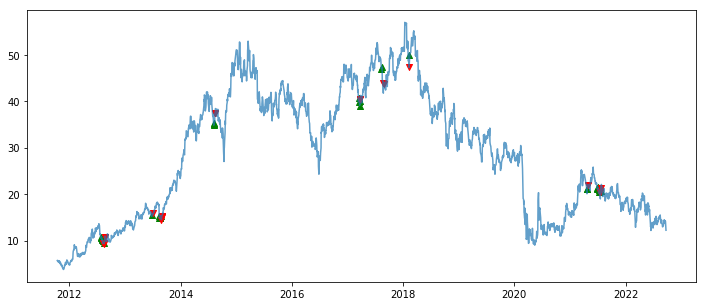

In [12]:
plt.figure(figsize=(12,5))
plt.scatter(Frame.loc[buy].index,Frame.loc[buy]['Adj Close'],marker='^',c='g')
plt.scatter(Frame.loc[sell].index,Frame.loc[sell]['Adj Close'],marker='v',c='r')
plt.plot(Frame['Adj Close'],alpha=0.7)

In [13]:
Profit=(Frame.loc[sell].Open.values-Frame.loc[buy].Open.values)/Frame.loc[buy].Open.values

In [14]:
Profit

array([-0.08399653, -0.10317461, -0.04380236, -0.08133088,  0.07049343,
        0.06941656,  0.01726268, -0.0417445 ,  0.00375707,  0.02547774,
        0.00814027,  0.02941177,  0.01898735,  0.01194221,  0.05306342,
        0.02122014,  0.05306342, -0.02353784,  0.01407407,  0.03242838,
        0.00909088, -0.11154639, -0.07429392,  0.04298457,  0.07546228,
        0.06166749, -0.02110689, -0.02513043, -0.04238472,  0.03420525,
       -0.01106308, -0.01485392,  0.09133867])

In [15]:
wins=[i for i in Profit if i > 0]

In [16]:
len(wins)/len(Profit)

0.6060606060606061

In [17]:
matrixsignals=[]
matrixprofits=[]

for i in range(200):
    try:
        Frame=RSIcalc(tickers[i])
        buy,sell=getSignals(Frame)
    except Exception as ex:
        print(ex,tickers.pop(1))
    else:
        Profit=(Frame.loc[sell].Open.values-Frame.loc[buy].Open.values)/Frame.loc[buy].Open.values
        matrixsignals.append(buy)
        matrixprofits.append(Profit)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
cannot set a frame with no defined index and a scalar ABMD
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%******************

In [18]:
matrixprofits

[array([ 0.01841858,  0.01323802, -0.0115183 , -0.01105814,  0.00212315,
         0.01287556,  0.03632401,  0.02847867,  0.01033357,  0.01558087,
         0.01012236, -0.00346098,  0.00108178, -0.00407378,  0.02345979,
         0.01052883,  0.02759942,  0.00556546,  0.00556546,  0.01286469,
         0.0062834 ,  0.01170129,  0.01861865,  0.01306246,  0.0130085 ,
         0.01320242, -0.00076654,  0.00355307, -0.01841872,  0.01366927,
         0.02033747,  0.01195283,  0.01595001,  0.00852711,  0.02154845,
         0.00861573,  0.01892706, -0.0052846 ,  0.01409035,  0.01120925]),
 array([ 0.01139   ,  0.02685855,  0.03080768,  0.03023579,  0.01865058,
         0.01447318, -0.06519997, -0.03349874, -0.00586631, -0.01515151,
         0.00828728,  0.00700343,  0.03806611,  0.04262805,  0.02528094,
         0.0295075 ,  0.03721785,  0.03030303,  0.10867306, -0.08967923,
         0.00066135,  0.01181451,  0.00799468,  0.00487052,  0.01954175,
         0.02925172,  0.035592  ,  0.00256128,  0

In [19]:
matrixsignals

[[Timestamp('2012-03-07 00:00:00'),
  Timestamp('2012-04-11 00:00:00'),
  Timestamp('2012-05-15 00:00:00'),
  Timestamp('2012-05-16 00:00:00'),
  Timestamp('2012-05-18 00:00:00'),
  Timestamp('2012-05-21 00:00:00'),
  Timestamp('2012-06-05 00:00:00'),
  Timestamp('2012-06-06 00:00:00'),
  Timestamp('2012-10-24 00:00:00'),
  Timestamp('2012-10-25 00:00:00'),
  Timestamp('2013-08-22 00:00:00'),
  Timestamp('2014-01-27 00:00:00'),
  Timestamp('2014-01-28 00:00:00'),
  Timestamp('2014-01-29 00:00:00'),
  Timestamp('2014-01-31 00:00:00'),
  Timestamp('2014-02-03 00:00:00'),
  Timestamp('2014-02-04 00:00:00'),
  Timestamp('2014-08-01 00:00:00'),
  Timestamp('2014-08-04 00:00:00'),
  Timestamp('2014-08-06 00:00:00'),
  Timestamp('2014-08-07 00:00:00'),
  Timestamp('2014-08-08 00:00:00'),
  Timestamp('2014-10-02 00:00:00'),
  Timestamp('2014-10-03 00:00:00'),
  Timestamp('2015-04-30 00:00:00'),
  Timestamp('2015-05-01 00:00:00'),
  Timestamp('2016-10-12 00:00:00'),
  Timestamp('2016-10-13 00:0

In [20]:
allprofit=[]
for i in matrixprofits:
    for e in i:
        allprofit.append(e)
allprofit

[0.018418579706364967,
 0.013238018338075487,
 -0.011518300161961533,
 -0.011058136854156816,
 0.0021231458807208312,
 0.012875558731741366,
 0.03632401178135978,
 0.028478671982978803,
 0.010333574992244634,
 0.015580865509459993,
 0.010122361761294841,
 -0.0034609824138999794,
 0.0010817790030185125,
 -0.004073779818850855,
 0.023459785828550146,
 0.010528826163336873,
 0.027599421741614928,
 0.005565457104999853,
 0.005565457104999853,
 0.012864692352916469,
 0.006283395964641448,
 0.011701289219769826,
 0.018618650760615963,
 0.013062456337555556,
 0.013008501408338877,
 0.013202419879189003,
 -0.0007665381965443523,
 0.003553065203201138,
 -0.018418724518970305,
 0.013669271812818008,
 0.020337466426487982,
 0.011952832489283168,
 0.01595001220703125,
 0.008527108646859727,
 0.02154844541533546,
 0.00861572556046653,
 0.01892706151398465,
 -0.005284596182899224,
 0.014090350783795424,
 0.011209247430109006,
 0.011390001361125114,
 0.026858548374935554,
 0.030807678266960632,
 0.03

In [21]:
wins=[i for i in allprofit if i > 0]
wins

[0.018418579706364967,
 0.013238018338075487,
 0.0021231458807208312,
 0.012875558731741366,
 0.03632401178135978,
 0.028478671982978803,
 0.010333574992244634,
 0.015580865509459993,
 0.010122361761294841,
 0.0010817790030185125,
 0.023459785828550146,
 0.010528826163336873,
 0.027599421741614928,
 0.005565457104999853,
 0.005565457104999853,
 0.012864692352916469,
 0.006283395964641448,
 0.011701289219769826,
 0.018618650760615963,
 0.013062456337555556,
 0.013008501408338877,
 0.013202419879189003,
 0.003553065203201138,
 0.013669271812818008,
 0.020337466426487982,
 0.011952832489283168,
 0.01595001220703125,
 0.008527108646859727,
 0.02154844541533546,
 0.00861572556046653,
 0.01892706151398465,
 0.014090350783795424,
 0.011209247430109006,
 0.011390001361125114,
 0.026858548374935554,
 0.030807678266960632,
 0.03023578850640684,
 0.018650584812147604,
 0.014473176465010864,
 0.00828727960619615,
 0.007003434603887154,
 0.03806610617627123,
 0.04262804906517282,
 0.025280942404993

In [22]:
len(wins)/len(allprofit)

0.7069602272727272

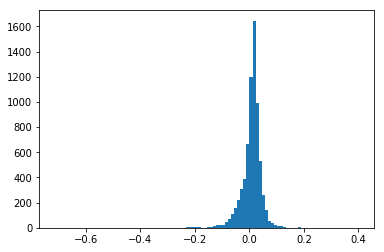

In [23]:
plt.hist(allprofit,bins=100)
plt.show()